# FLANDERS

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

# manage warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
FILEPATH = 'data\\'

In [3]:
df = pd.read_csv(FILEPATH + "all_results.csv", header=0)

In [4]:
df.columns

Index(['strategy', 'fraction_mal', 'magnitude', 'frac_fit', 'frac_eval',
       'min_fit_clients', 'min_eval_clients', 'min_available_clients',
       'num_clients', 'num_malicious', 'attack', 'iid', 'dataset_name',
       'confusion_matrix', 'warmup_rounds', 'id', 'round', 'auc', 'accuracy',
       'loss'],
      dtype='object')

In [5]:
print("Strategy: {}".format(df.strategy.unique()))
print("Attack: {}".format(df.attack.unique()))
print("Dataset: {}".format(df.dataset_name.unique()))

Strategy: ['flanders' 'fltrust' 'mscred' 'krum' 'multikrum' 'bulyan' 'trimmedmean']
Attack: ['fang' 'minmax' 'lie' 'gaussian' 'no attack']
Dataset: ['income']


In [6]:
# overall accuracy
df.accuracy.describe()

count    11220.000000
mean         0.768636
std          0.138503
min          0.239558
25%          0.801930
50%          0.811630
75%          0.817568
max          0.824324
Name: accuracy, dtype: float64

<h2>Accuracy</h2>

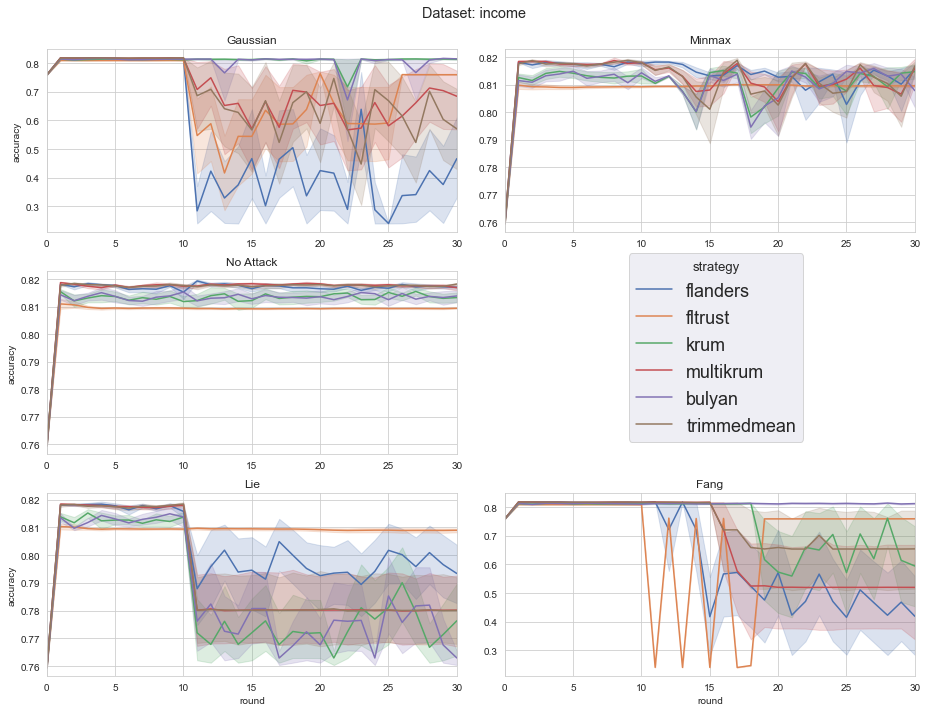

In [7]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(3, 2)
fig.delaxes(axes[1,1])

dataset = df.dataset_name.unique()[0]
dfl = df.loc[df.dataset_name == dataset].loc[df.strategy != "mscred"]

fig.set_figheight(10)
fig.set_figwidth(13)
plt.gcf().suptitle('Dataset: {}'.format(dataset), fontsize="x-large")
fig.tight_layout(pad=2.0)

sns.set(font_scale=1.1)
ax1 = sns.lineplot(data=dfl.loc[dfl.attack == "gaussian"], y='accuracy', x='round', hue='strategy', ax=axes[0][0])
ax1.get_legend().remove()
ax1.set_xlabel('')
ax1.title.set_text('Gaussian')
ax1.set_xlim(0, 30)


ax2 = sns.lineplot(data=dfl.loc[dfl.attack == "minmax"], y='accuracy', x='round', hue='strategy', ax=axes[0][1])
#ax2.get_legend().remove()
ax2.title.set_text('Minmax')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_xlim(0, 30)

ax5 = sns.lineplot(data=dfl.loc[dfl.attack == "no attack"], y='accuracy', x='round', hue='strategy', ax=axes[1][0])
ax5.get_legend().remove()
ax5.title.set_text('No Attack')
ax5.set_xlabel('')
ax5.set_xlim(0, 30)

ax3 = sns.lineplot(data=dfl.loc[dfl.attack == "lie"], y='accuracy', x='round', hue='strategy', ax=axes[2][0])
ax3.get_legend().remove()
ax3.title.set_text('Lie')
ax3.set_xlim(0, 30)

ax4 = sns.lineplot(data=dfl.loc[dfl.attack == "fang"], y='accuracy', x='round', hue='strategy', ax=axes[2][1])
ax4.get_legend().remove()
ax4.title.set_text('Fang')
ax4.set_ylabel('')
ax4.set_xlim(0, 30)

sns.move_legend(ax2, "lower right", bbox_to_anchor=(0.75,-1.2), prop={'size': 18})

plt.savefig("accuracy_lineplot.jpg", dpi=200)

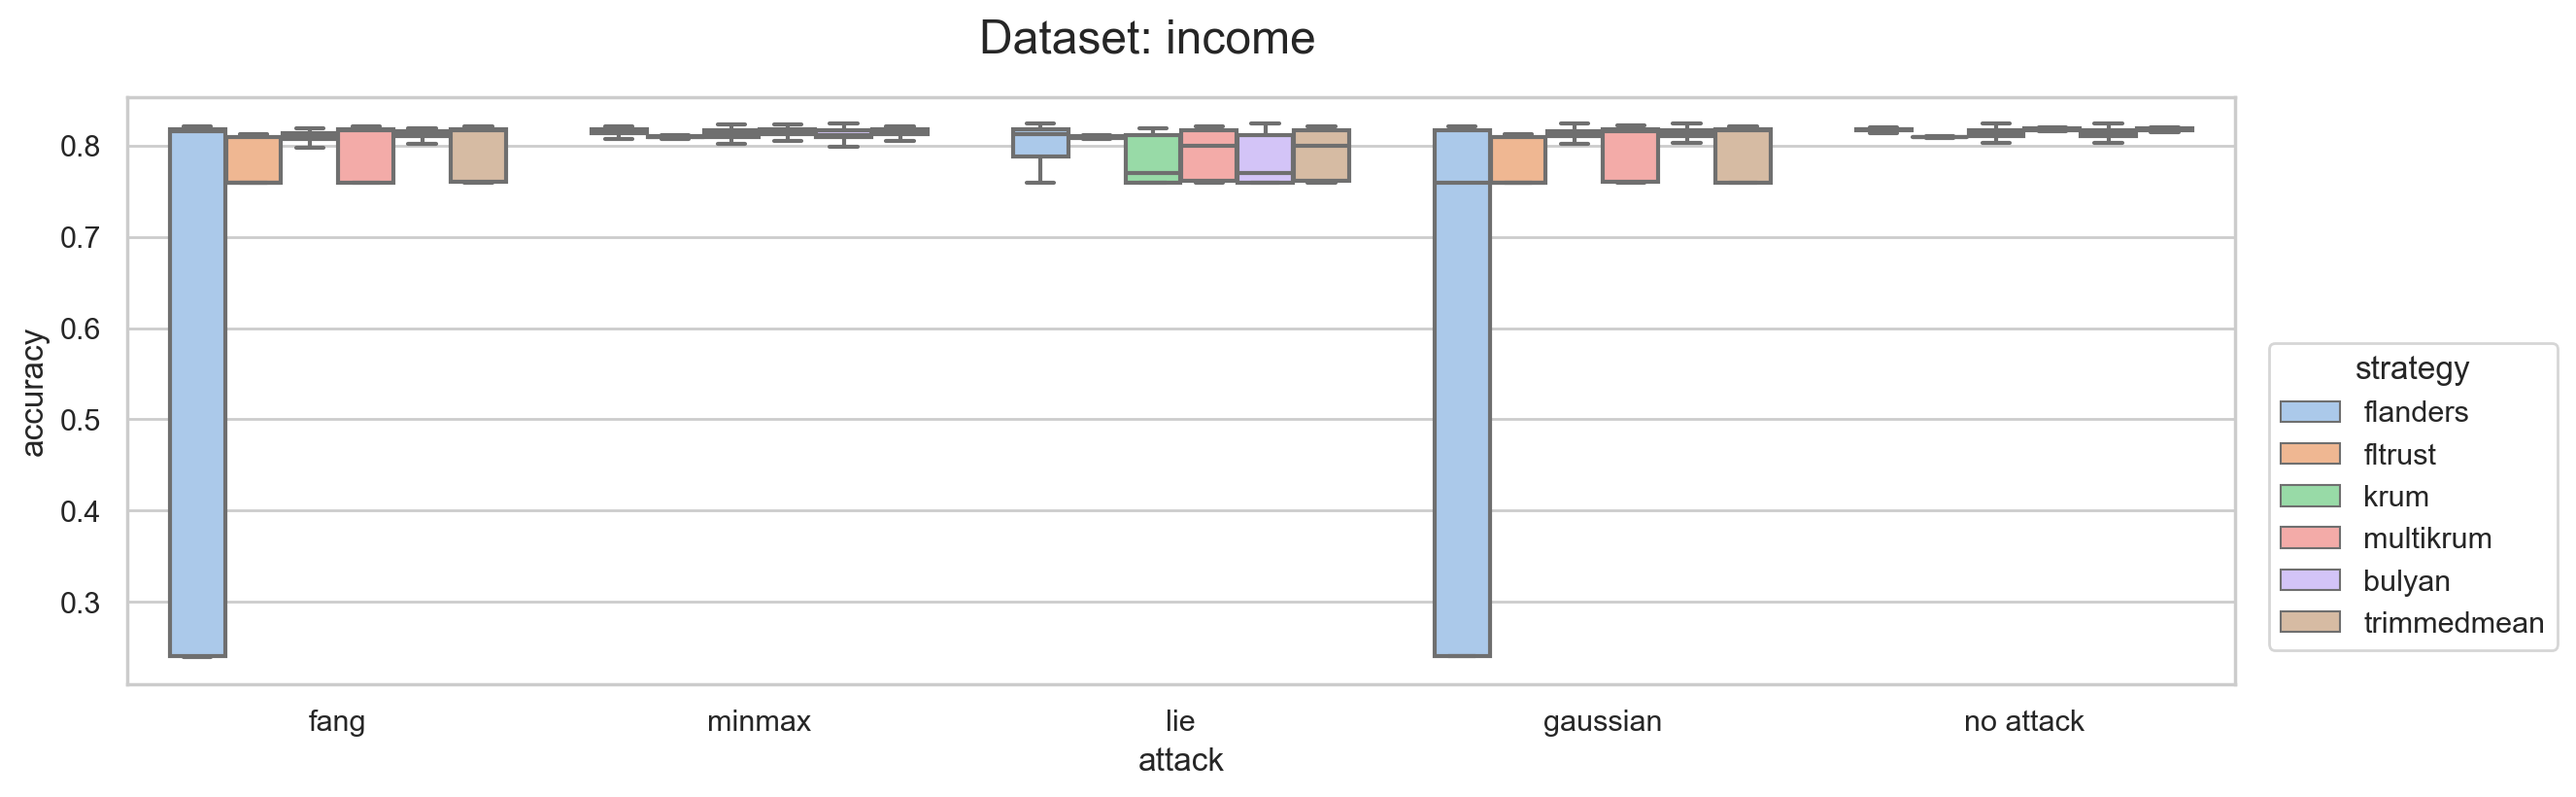

In [20]:
sns.set_style('whitegrid')
plt.figure(figsize=(14, 4), dpi=200)
plt.gcf().suptitle('Dataset: {}'.format(dataset), fontsize="x-large")


#sns.set(font_scale=1.)

ax = sns.boxplot(data=dfl, x="attack", y="accuracy", hue="strategy", fliersize=0, palette="pastel")
sns.move_legend(ax, "upper right", bbox_to_anchor=(1.16,0.605))
plt.savefig("accuracy_boxplot.jpg", bbox_inches='tight', dpi=300)

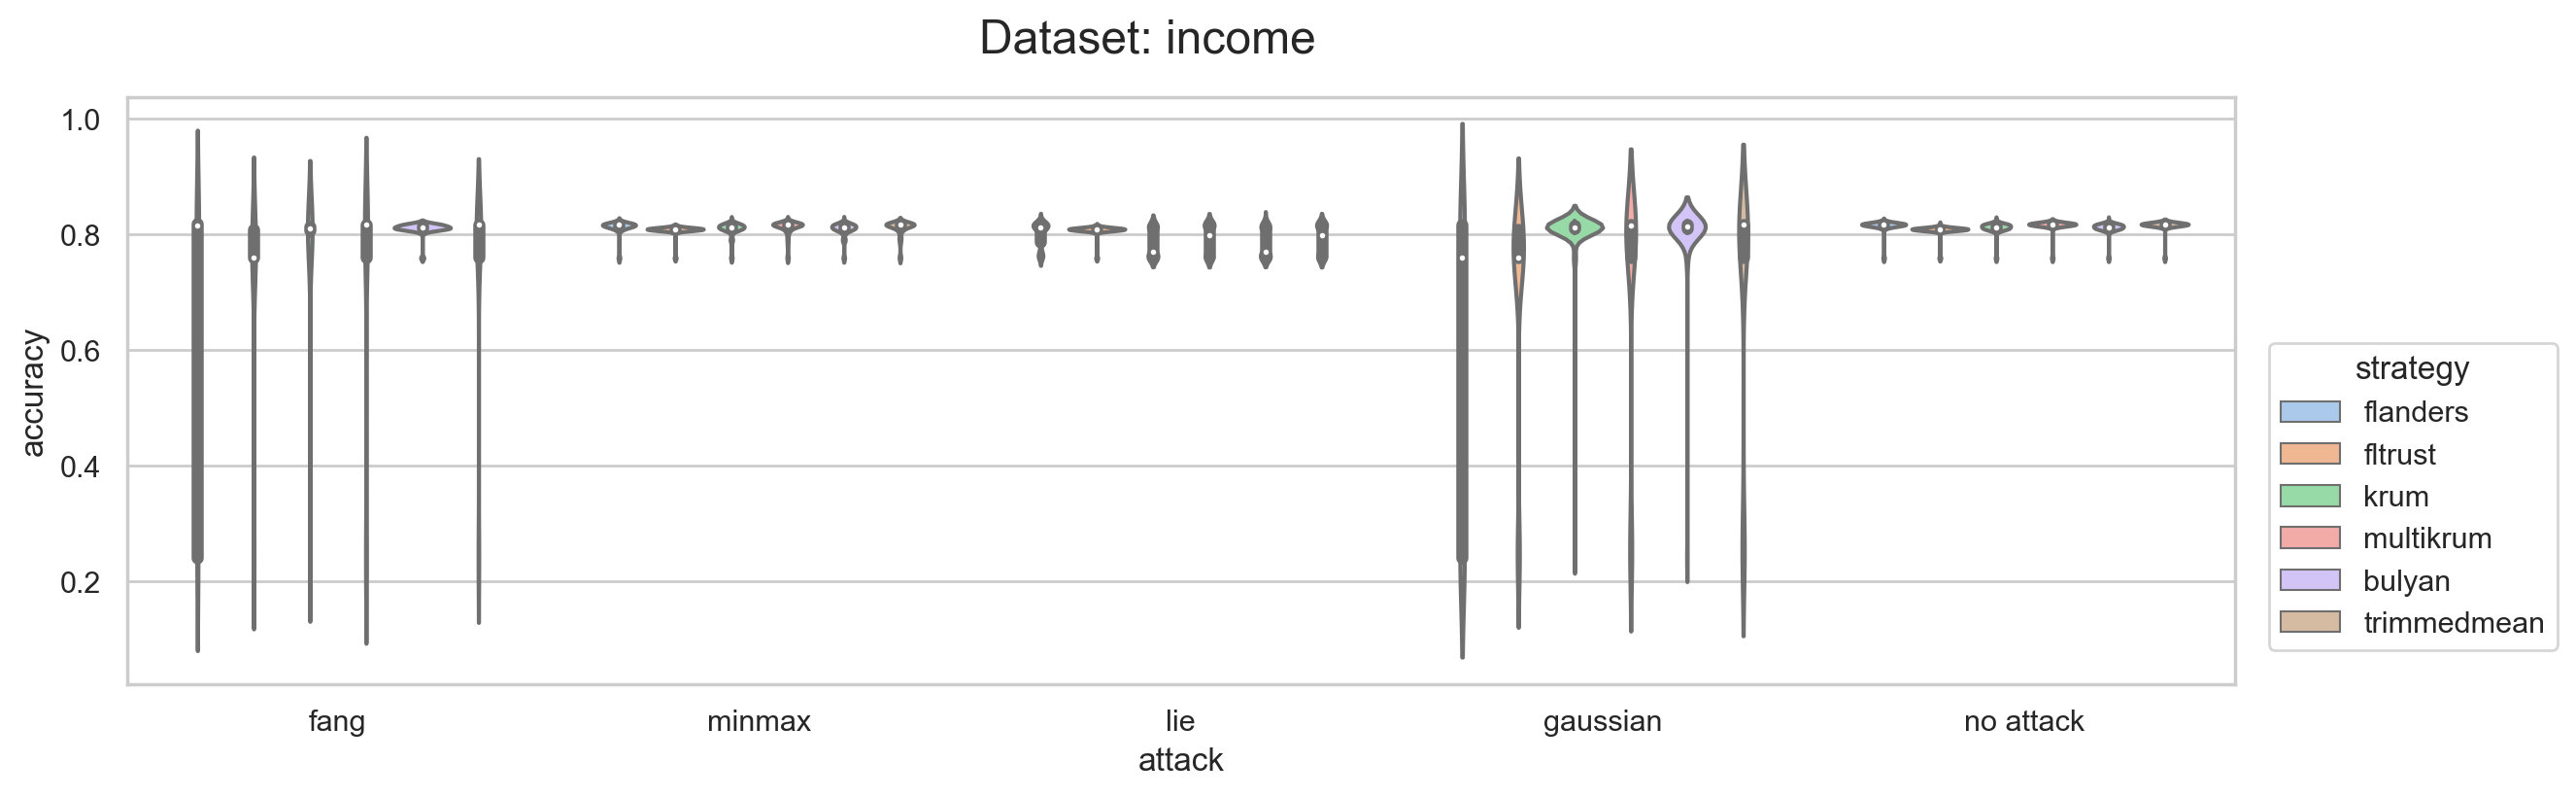

In [21]:
sns.set_style('whitegrid')
plt.figure(figsize=(14, 4), dpi=200)
plt.gcf().suptitle('Dataset: {}'.format(dataset), fontsize="x-large")


#sns.set(font_scale=1.)

ax = sns.violinplot(data=dfl, x="attack", y="accuracy", hue="strategy", fliersize=0, palette="pastel")
sns.move_legend(ax, "upper right", bbox_to_anchor=(1.16,0.605))
plt.savefig("accuracy_violinplot.jpg", bbox_inches='tight', dpi=300)

<h2>AUC</h2>

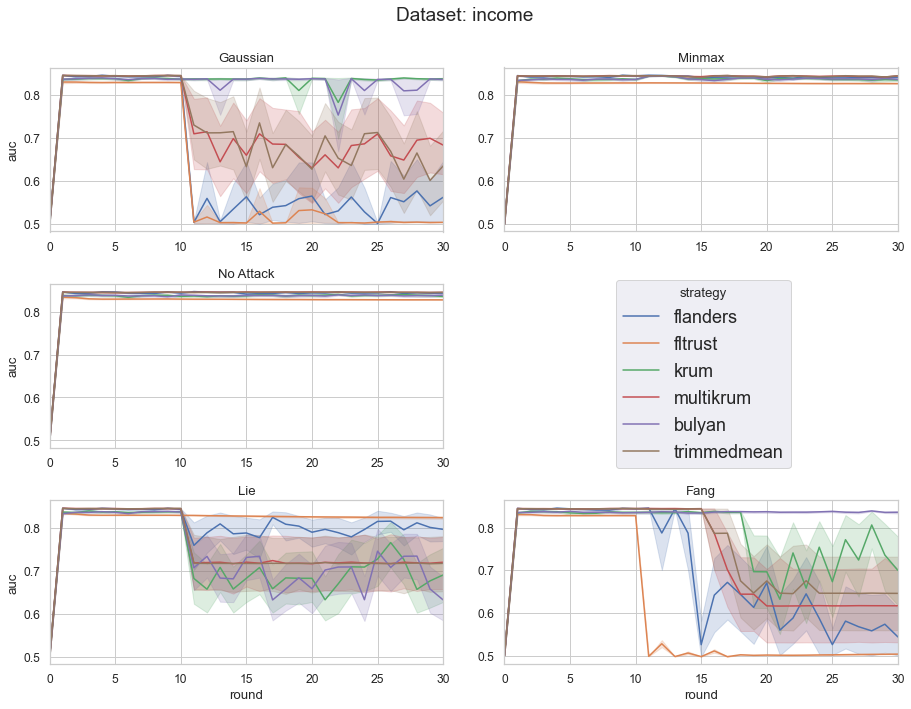

In [10]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(3, 2)
fig.delaxes(axes[1,1])

fig.set_figheight(10)
fig.set_figwidth(13)
plt.gcf().suptitle('Dataset: {}'.format(dataset), fontsize="x-large")
fig.tight_layout(pad=2.0)

sns.set(font_scale=1.1)
ax1 = sns.lineplot(data=dfl.loc[dfl.attack == "gaussian"], y='auc', x='round', hue='strategy', ax=axes[0][0])
ax1.get_legend().remove()
ax1.set_xlabel('')
ax1.title.set_text('Gaussian')
ax1.set_xlim(0, 30)


ax2 = sns.lineplot(data=dfl.loc[dfl.attack == "minmax"], y='auc', x='round', hue='strategy', ax=axes[0][1])
#ax2.get_legend().remove()
ax2.title.set_text('Minmax')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_xlim(0, 30)

ax5 = sns.lineplot(data=dfl.loc[dfl.attack == "no attack"], y='auc', x='round', hue='strategy', ax=axes[1][0])
ax5.get_legend().remove()
ax5.title.set_text('No Attack')
ax5.set_xlabel('')
ax5.set_xlim(0, 30)

ax3 = sns.lineplot(data=dfl.loc[dfl.attack == "lie"], y='auc', x='round', hue='strategy', ax=axes[2][0])
ax3.get_legend().remove()
ax3.title.set_text('Lie')
ax3.set_xlim(0, 30)

ax4 = sns.lineplot(data=dfl.loc[dfl.attack == "fang"], y='auc', x='round', hue='strategy', ax=axes[2][1])
ax4.get_legend().remove()
ax4.title.set_text('Fang')
ax4.set_ylabel('')
ax4.set_xlim(0, 30)

sns.move_legend(ax2, "lower right", bbox_to_anchor=(0.75,-1.5), prop={'size': 18})

plt.savefig("auc_lineplot.jpg", dpi=200)

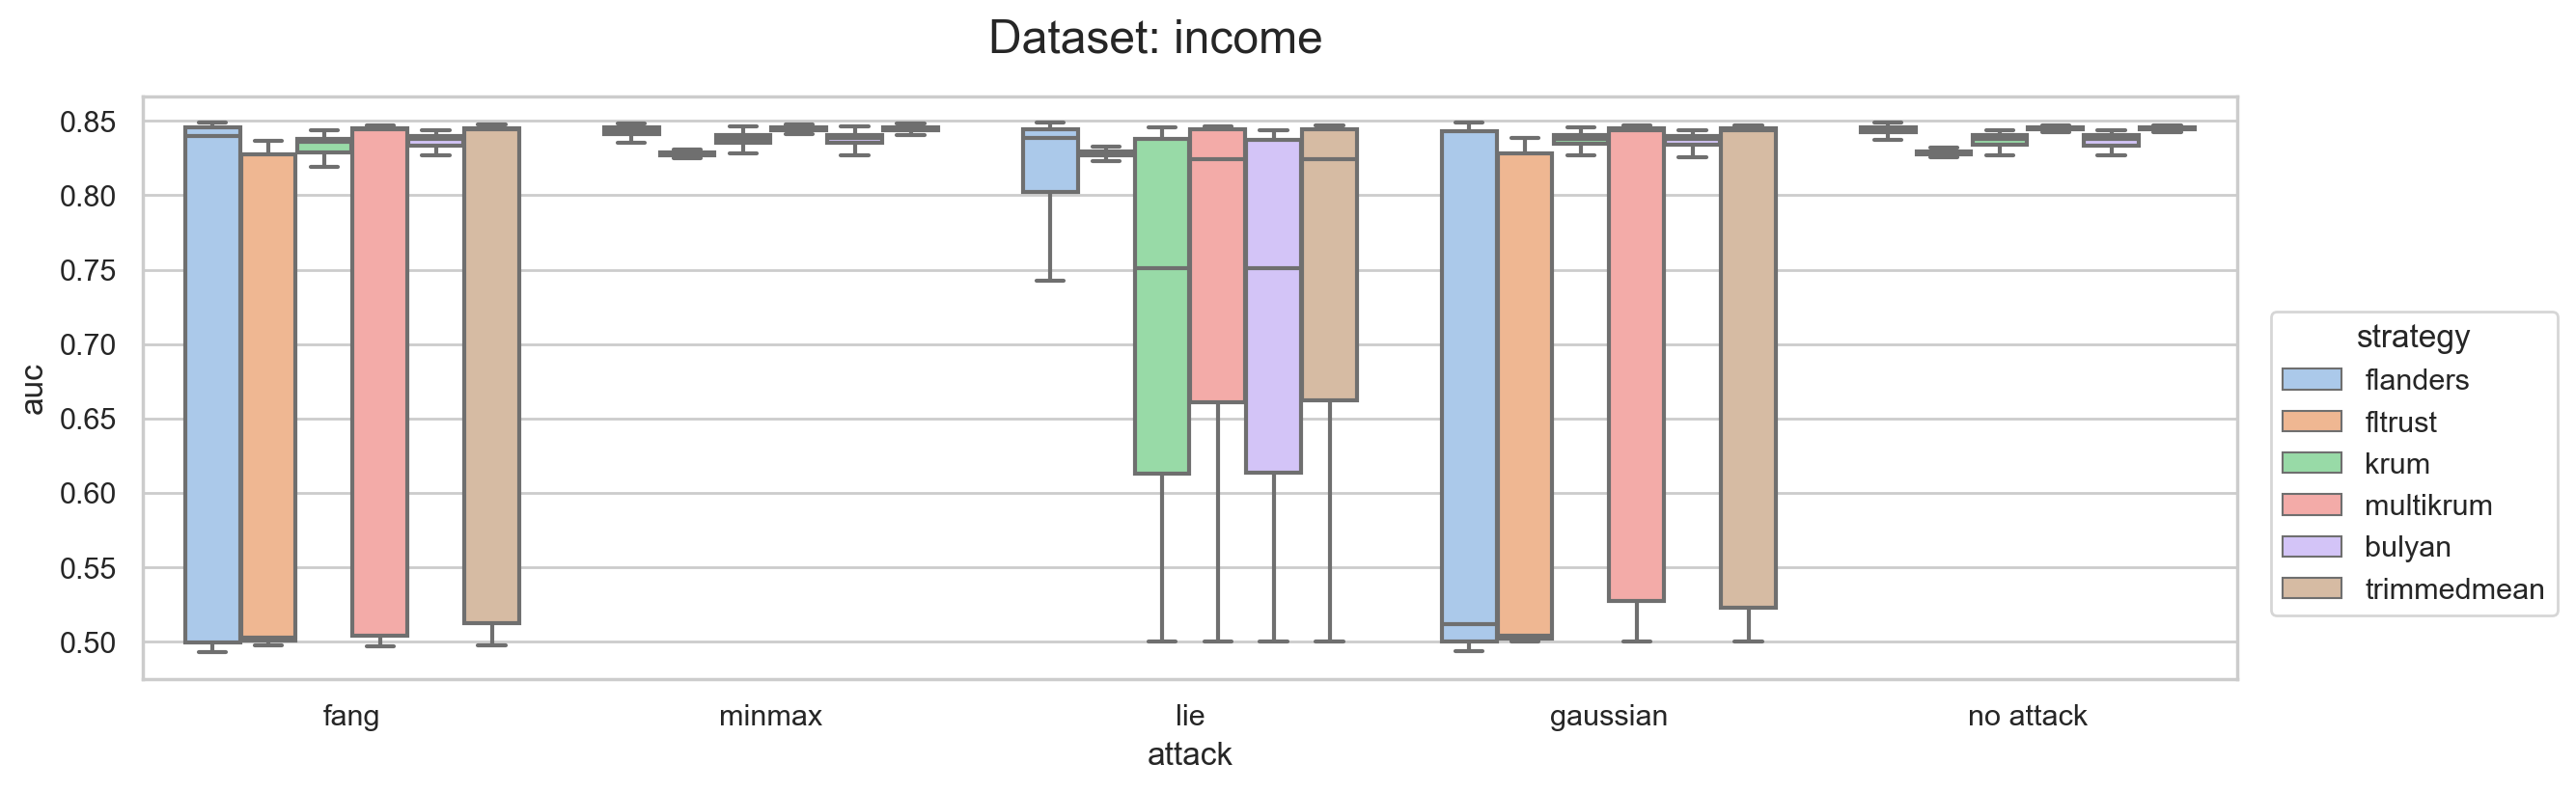

In [22]:
sns.set_style('whitegrid')
plt.figure(figsize=(14, 4), dpi=200)
plt.gcf().suptitle('Dataset: {}'.format(dataset), fontsize="x-large")


#sns.set(font_scale=1.)

ax = sns.boxplot(data=dfl, x="attack", y="auc", hue="strategy", fliersize=0, palette="pastel")
sns.move_legend(ax, "upper right", bbox_to_anchor=(1.16,0.655))
plt.savefig("auc_boxplot.jpg", bbox_inches='tight', dpi=300)

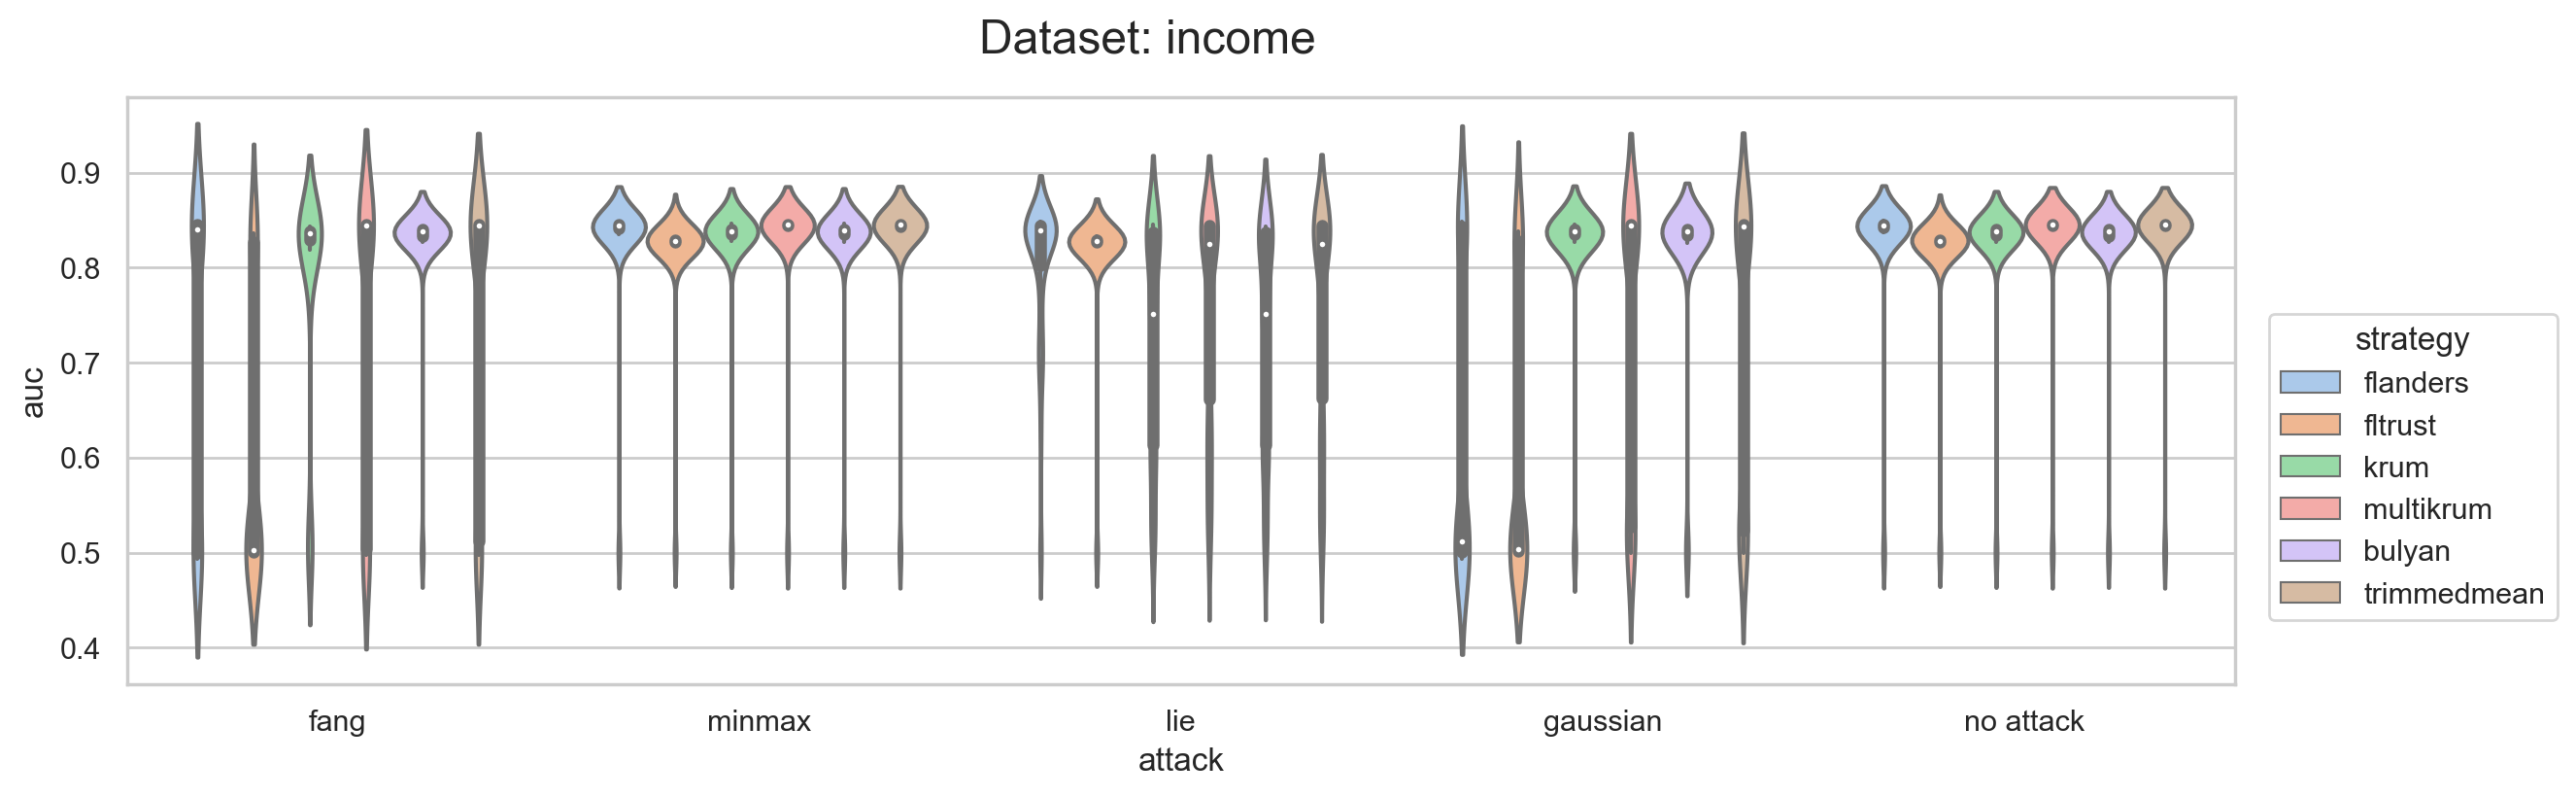

In [23]:
sns.set_style('whitegrid')
plt.figure(figsize=(14, 4), dpi=200)
plt.gcf().suptitle('Dataset: {}'.format(dataset), fontsize="x-large")


#sns.set(font_scale=1.)

ax = sns.violinplot(data=dfl, x="attack", y="auc", hue="strategy", fliersize=0, palette="pastel")
sns.move_legend(ax, "upper right", bbox_to_anchor=(1.16,0.655))
plt.savefig("auc_violinplot.jpg", bbox_inches='tight', dpi=300)

<h2>Loss</h2>

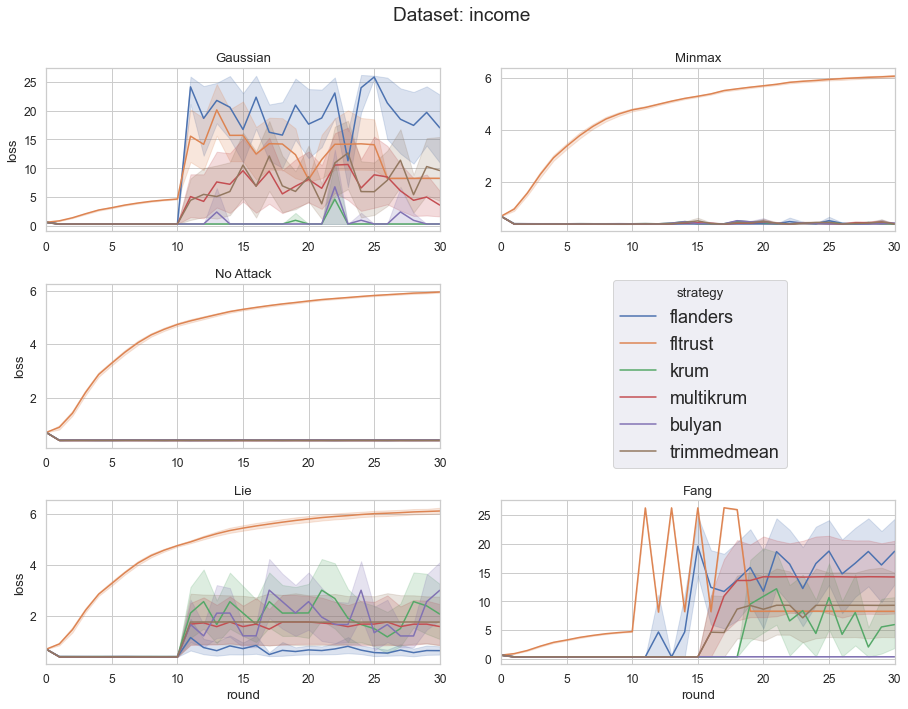

In [13]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(3, 2)
fig.delaxes(axes[1,1])

fig.set_figheight(10)
fig.set_figwidth(13)
plt.gcf().suptitle('Dataset: {}'.format(dataset), fontsize="x-large")
fig.tight_layout(pad=2.0)

sns.set(font_scale=1.1)
ax1 = sns.lineplot(data=dfl.loc[dfl.attack == "gaussian"], y='loss', x='round', hue='strategy', ax=axes[0][0])
ax1.get_legend().remove()
ax1.set_xlabel('')
ax1.title.set_text('Gaussian')
ax1.set_xlim(0, 30)


ax2 = sns.lineplot(data=dfl.loc[dfl.attack == "minmax"], y='loss', x='round', hue='strategy', ax=axes[0][1])
#ax2.get_legend().remove()
ax2.title.set_text('Minmax')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_xlim(0, 30)

ax5 = sns.lineplot(data=dfl.loc[dfl.attack == "no attack"], y='loss', x='round', hue='strategy', ax=axes[1][0])
ax5.get_legend().remove()
ax5.title.set_text('No Attack')
ax5.set_xlabel('')
ax5.set_xlim(0, 30)

ax3 = sns.lineplot(data=dfl.loc[dfl.attack == "lie"], y='loss', x='round', hue='strategy', ax=axes[2][0])
ax3.get_legend().remove()
ax3.title.set_text('Lie')
ax3.set_xlim(0, 30)

ax4 = sns.lineplot(data=dfl.loc[dfl.attack == "fang"], y='loss', x='round', hue='strategy', ax=axes[2][1])
ax4.get_legend().remove()
ax4.title.set_text('Fang')
ax4.set_ylabel('')
ax4.set_xlim(0, 30)

sns.move_legend(ax2, "lower right", bbox_to_anchor=(0.75,-1.5), prop={'size': 18})

plt.savefig("loss_lineplot.jpg", dpi=200)

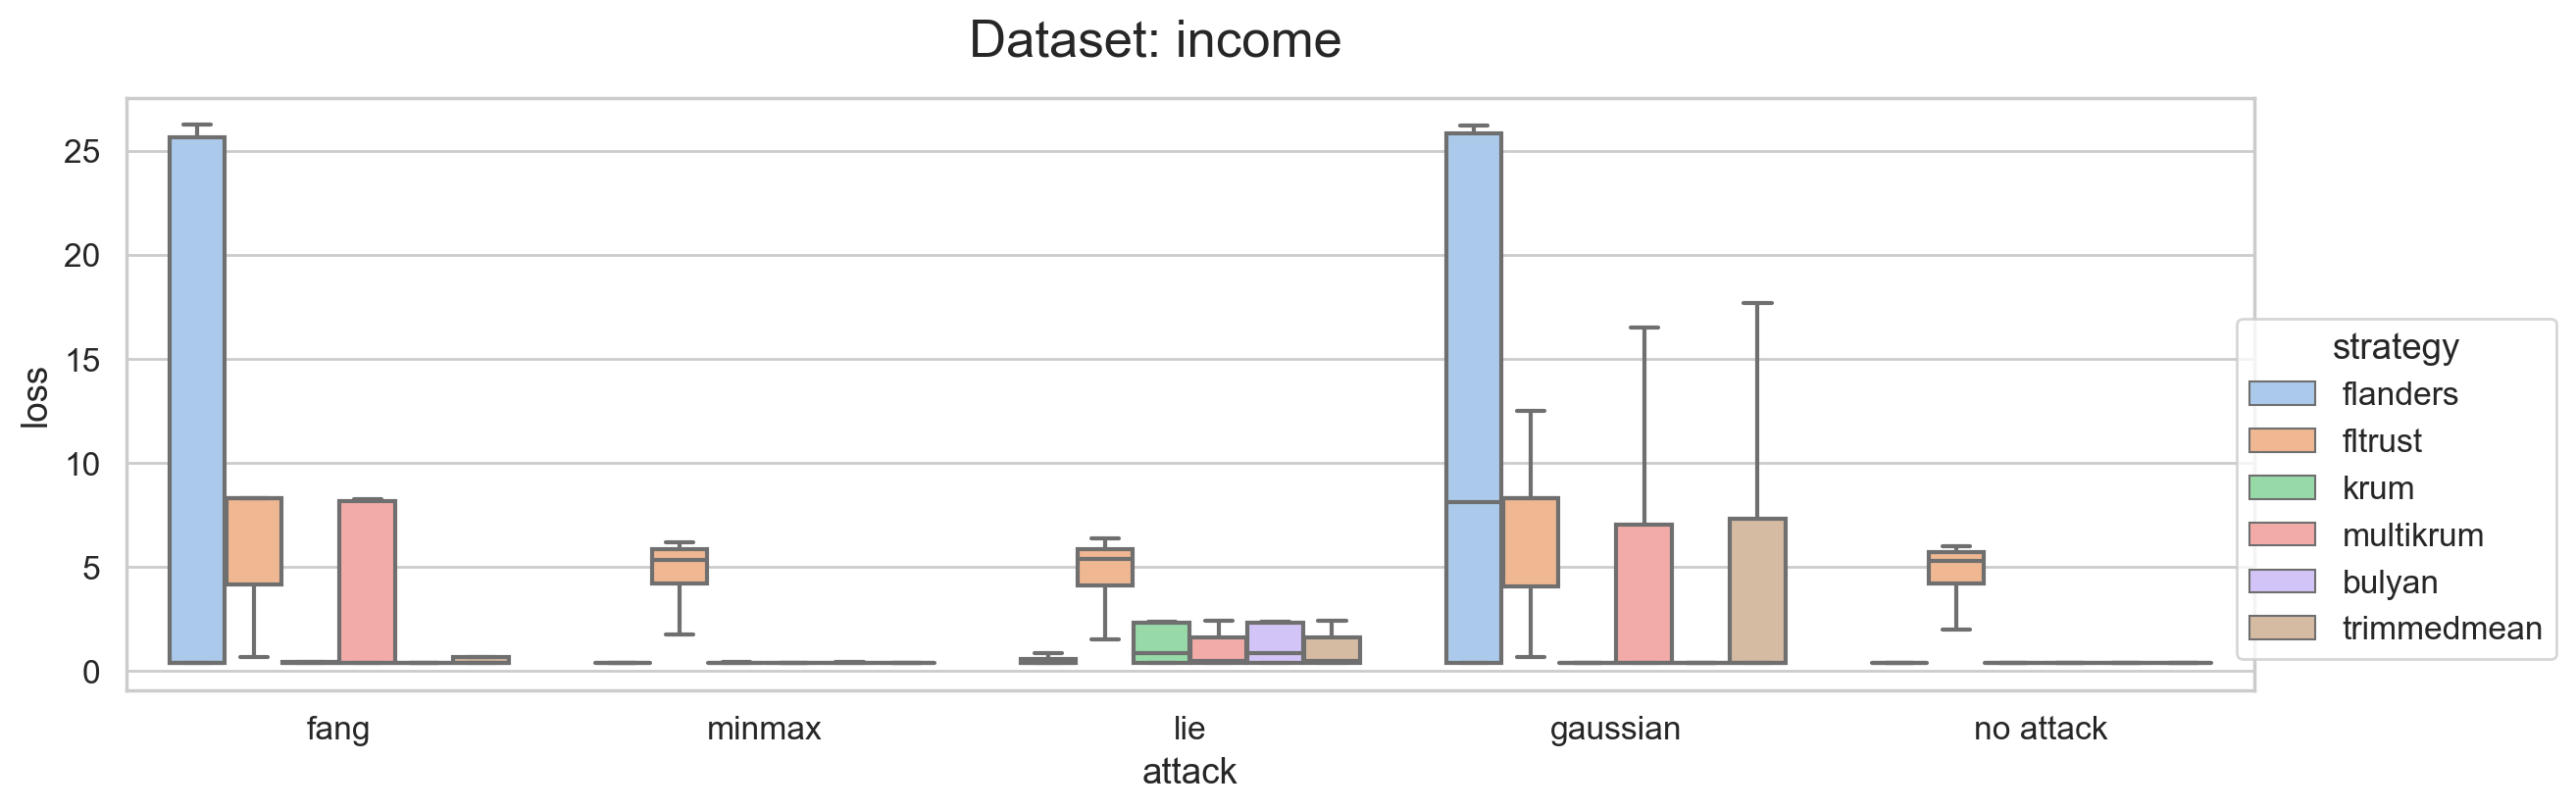

In [14]:
sns.set_style('whitegrid')
plt.figure(figsize=(14, 4), dpi=200)
plt.gcf().suptitle('Dataset: {}'.format(dataset), fontsize="x-large")


#sns.set(font_scale=1.)

ax = sns.boxplot(data=dfl, x="attack", y="loss", hue="strategy", fliersize=0, palette="pastel")
sns.move_legend(ax, "upper right", bbox_to_anchor=(1.15,0.655))
plt.savefig("loss_boxplot.jpg", bbox_inches='tight', dpi=300)

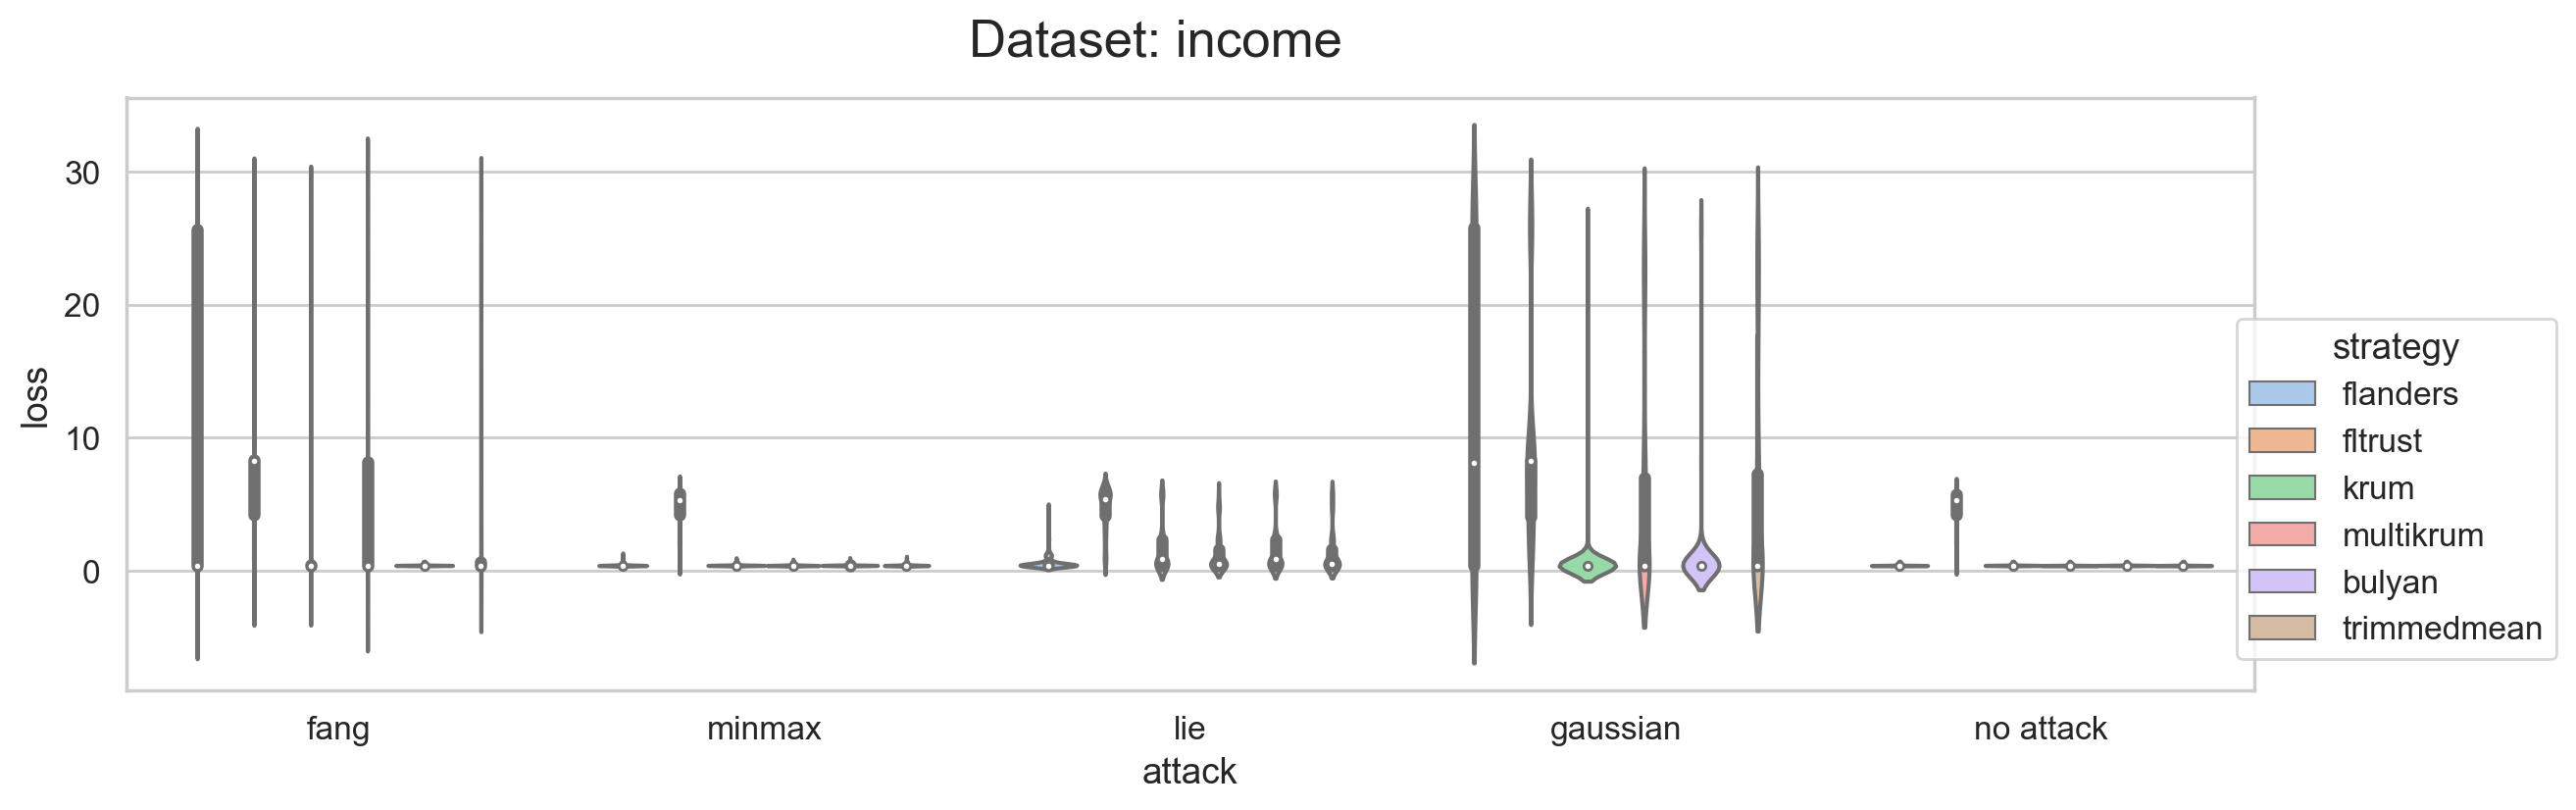

In [15]:
sns.set_style('whitegrid')
plt.figure(figsize=(14, 4), dpi=200)
plt.gcf().suptitle('Dataset: {}'.format(dataset), fontsize="x-large")


#sns.set(font_scale=1.)

ax = sns.violinplot(data=dfl, x="attack", y="loss", hue="strategy", fliersize=0, palette="pastel")
sns.move_legend(ax, "upper right", bbox_to_anchor=(1.15,0.655))
plt.savefig("loss_violinplot.jpg", bbox_inches='tight', dpi=300)

<h1>Densities</h1>

<h2>Accuracy</h2>

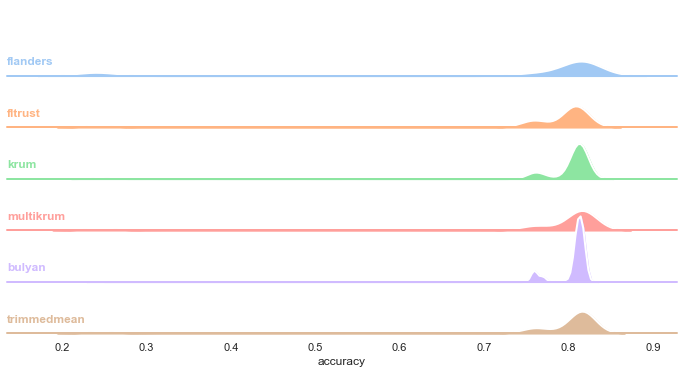

In [16]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

g = sns.FacetGrid(dfl, row="strategy", hue="strategy", aspect=15, height=.3, palette="pastel")
# Draw the densities in a few steps
g.map(sns.kdeplot, "accuracy", bw_adjust=.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "accuracy", clip_on=False, color="w", lw=2, bw_adjust=.5)
# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "accuracy")
# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")

g.despine(bottom=True, left=True)
plt.gcf().set_size_inches(12, 6)
plt.savefig("accuracy_density.jpg", bbox_inches='tight', dpi=300)

<h2>AUC</h2>

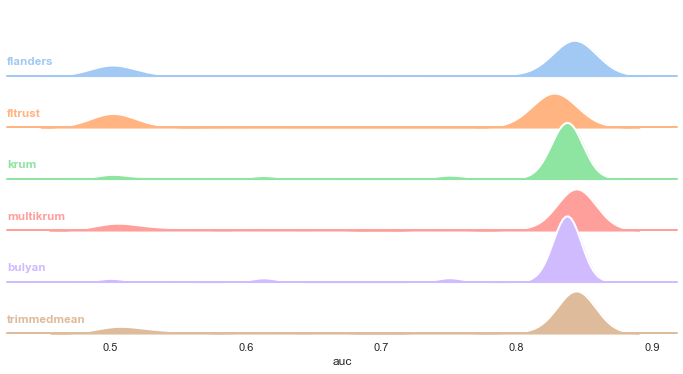

In [17]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

g = sns.FacetGrid(dfl, row="strategy", hue="strategy", aspect=15, height=.3, palette="pastel")
# Draw the densities in a few steps
g.map(sns.kdeplot, "auc", bw_adjust=.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "auc", clip_on=False, color="w", lw=2, bw_adjust=.5)
# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "auc")
# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")

g.despine(bottom=True, left=True)
plt.gcf().set_size_inches(12, 6)
plt.savefig("auc_density.jpg", bbox_inches='tight', dpi=300)

<h2>Loss</h2>

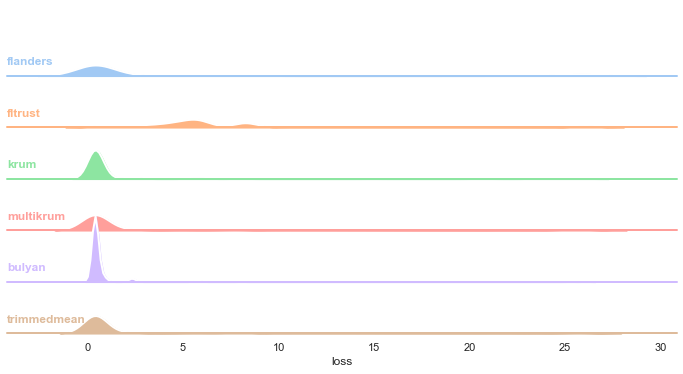

In [18]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

g = sns.FacetGrid(dfl, row="strategy", hue="strategy", aspect=15, height=.3, palette="pastel")
# Draw the densities in a few steps
g.map(sns.kdeplot, "loss", bw_adjust=.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "loss", clip_on=False, color="w", lw=2, bw_adjust=.5)
# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "loss")
# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")

g.despine(bottom=True, left=True)
plt.gcf().set_size_inches(12, 6)
plt.savefig("loss_density.jpg", bbox_inches='tight', dpi=300)